<div class="alert alert-block alert-success">
    <b><center>CNN Basic Examples</center></b>
    <b><center>RSNET</center></b>
</div>

# Configure Learning Environment

In [1]:
# !pip install git+https://github.com/nockchun/rspy --force
# !pip install mybatis_mapper2sql
import rspy as rsp
rsp.setSystemWarning(off=True)

In [2]:
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers, models, losses, optimizers, datasets, preprocessing, utils

In [3]:
from ipywidgets import interact
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
np.set_printoptions(linewidth=200, precision=2)
tf.__version__

'2.2.0'

# CIFAR10 Dataset
The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [5]:
# Download the mnist dataset using keras
(train_data, train_label), (test_data, test_label) = datasets.cifar10.load_data()
train_data.shape, train_label.shape, test_data.shape, test_label.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [6]:
# Counting unique value of train data
unique, counts = np.unique(train_label, return_counts=True)
num_labels = len(unique)
f"Train labels: {dict(zip(unique, counts))}"

'Train labels: {0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000}'

# Preprocessing

In [7]:
# Normalizing
train_data_proc = train_data / 255
test_data_proc = test_data / 255

#One hot encoding
train_label_proc = utils.to_categorical(train_label, 10)
test_label_proc = utils.to_categorical(test_label, 10)

In [8]:
image_gen = preprocessing.image.ImageDataGenerator(
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True,
    rotation_range=30,
    zoom_range=0.3
)
train_gen = image_gen.flow(train_data_proc, train_label_proc)

# Create Model

In [9]:
input_aug = layers.Input((32, 32, 3))

In [10]:
layer_aug = layers.Conv2D(64, 4, padding="same", activation="relu")(input_aug)
layer_aug = layers.BatchNormalization()(layer_aug)
layer_aug = layers.Conv2D(64, 4, padding="same", activation="relu")(layer_aug)
layer_aug = layers.BatchNormalization()(layer_aug)
layer_aug = layers.MaxPool2D(2)(layer_aug)
layer_aug = layers.Dropout(0.3)(layer_aug)

In [11]:
layer_aug = layers.Conv2D(128, 3, padding="same", activation="relu")(layer_aug)
layer_aug = layers.BatchNormalization()(layer_aug)
layer_aug = layers.Conv2D(128, 3, padding="same", activation="relu")(layer_aug)
layer_aug = layers.BatchNormalization()(layer_aug)
layer_aug = layers.MaxPool2D(2)(layer_aug)
layer_aug = layers.Dropout(0.4)(layer_aug)

In [12]:
layer_aug = layers.Conv2D(256, 3, padding="same", activation="relu")(layer_aug)
layer_aug = layers.BatchNormalization()(layer_aug)
layer_aug = layers.Conv2D(256, 3, padding="same", activation="relu")(layer_aug)
layer_aug = layers.BatchNormalization()(layer_aug)
layer_max = layers.MaxPool2D(2)(layer_aug)
layer_aug = layers.Dropout(0.4)(layer_max)

In [13]:
layer_aug = layers.Conv2D(256, 3, padding="same", activation="relu")(layer_aug)
layer_aug = layers.BatchNormalization()(layer_aug)
layer_aug = layers.Conv2D(256, 3, padding="same", activation="relu")(layer_aug)
layer_aug = layers.BatchNormalization()(layer_aug)
layer_add1 = layers.add([layer_aug, layer_max])
layer_dout = layers.Dropout(0.4)(layer_add1)

In [14]:
layer_aug = layers.Conv2D(256, 3, padding="same", activation="relu")(layer_dout)
layer_aug = layers.BatchNormalization()(layer_aug)
layer_aug = layers.Conv2D(256, 3, padding="same", activation="relu")(layer_aug)
layer_aug = layers.BatchNormalization()(layer_aug)
layer_add2 = layers.add([layer_aug, layer_add1])
layer_aug = layers.Dropout(0.4)(layer_add2)

In [15]:
layer_aug = layers.Conv2D(256, 3, padding="same", activation="relu")(layer_aug)
layer_aug = layers.BatchNormalization()(layer_aug)
layer_aug = layers.Conv2D(256, 3, padding="same", activation="relu")(layer_aug)
layer_aug = layers.BatchNormalization()(layer_aug)
layer_add3 = layers.add([layer_aug, layer_add2])
layer_aug = layers.Dropout(0.4)(layer_add3)

In [16]:
layer_ext = layers.Conv2D(256, 3, padding="same", activation="relu")(layer_dout)
layer_ext = layers.BatchNormalization()(layer_ext)
layer_ext = layers.Conv2D(256, 3, padding="same", activation="relu")(layer_ext)
layer_ext = layers.BatchNormalization()(layer_ext)
layer_ext = layers.add([layer_ext, layer_aug, layer_max])
layer_ext = layers.Dropout(0.4)(layer_ext)

In [17]:
layer_aug = layers.Conv2D(512, 3, padding="same", activation="relu")(layer_ext)
layer_aug = layers.BatchNormalization()(layer_aug)
layer_aug = layers.Conv2D(512, 3, padding="same", activation="relu")(layer_aug)
layer_aug = layers.BatchNormalization()(layer_aug)
layer_aug = layers.MaxPool2D(2)(layer_aug)
layer_aug = layers.Dropout(0.5)(layer_aug)

In [18]:
layer_aug = layers.Conv2D(128, 3, padding="same", dilation_rate=2, activation="relu")(layer_aug)
layer_aug = layers.BatchNormalization()(layer_aug)
layer_aug  = layers.GlobalAveragePooling2D()(layer_aug)

In [19]:
output_aug = layers.Dense(10, activation="softmax")(layer_aug)

In [20]:
model_aug = models.Model(input_aug, output_aug)
model_aug.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 64)   3136        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 64)   256         conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 64)   65600       batch_normalization[0][0]        
______________________________________________________________________________________________

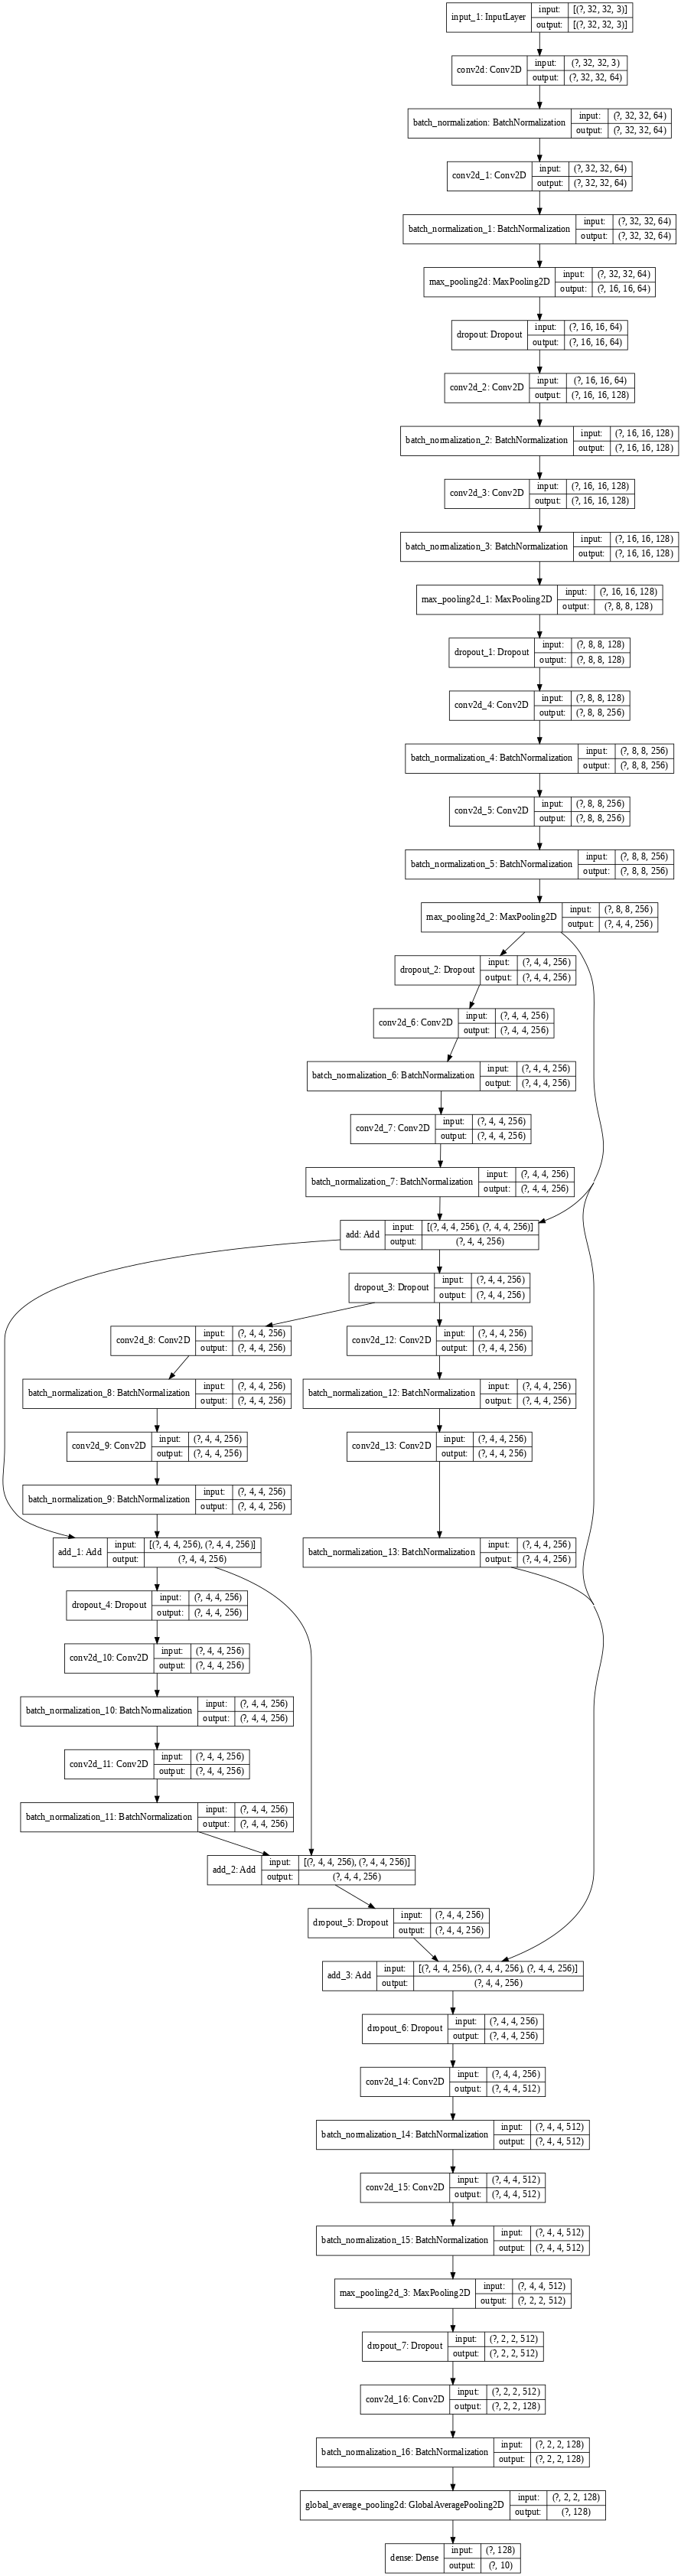

In [21]:
utils.plot_model(model_aug, "intermediate/model.png", True, dpi=60)

In [22]:
model_aug.compile(
    loss=losses.CategoricalCrossentropy(),
    optimizer=optimizers.Adam(),
    metrics=["accuracy"],
)

In [23]:
history_aug = model_aug.fit(
    train_gen,
    validation_data=(test_data_proc, test_label_proc),
    batch_size=1024*3,
    epochs=100
)

Epoch 1/100
1563/1563 [==============================] - 72s 46ms/step - loss: 1.7853 - accuracy: 0.3457 - val_loss: 1.5943 - val_accuracy: 0.4366
Epoch 2/100
1563/1563 [==============================] - 21s 14ms/step - loss: 1.4881 - accuracy: 0.4641 - val_loss: 1.4680 - val_accuracy: 0.5117
Epoch 3/100
1563/1563 [==============================] - 21s 14ms/step - loss: 1.3134 - accuracy: 0.5365 - val_loss: 1.4785 - val_accuracy: 0.5435
Epoch 4/100
1563/1563 [==============================] - 21s 14ms/step - loss: 1.1854 - accuracy: 0.5854 - val_loss: 1.5760 - val_accuracy: 0.5247
Epoch 5/100
1563/1563 [==============================] - 21s 14ms/step - loss: 1.1050 - accuracy: 0.6154 - val_loss: 0.9919 - val_accuracy: 0.6694
Epoch 6/100
1563/1563 [==============================] - 21s 14ms/step - loss: 1.0346 - accuracy: 0.6419 - val_loss: 0.9650 - val_accuracy: 0.6781
Epoch 7/100
1563/1563 [==============================] - 21s 14ms/step - loss: 0.9818 - accuracy: 0.6610 - val_loss: 0

<AxesSubplot:>

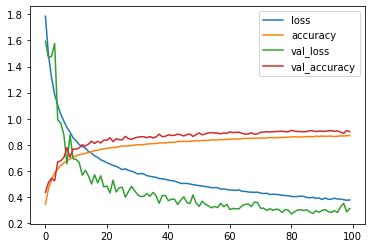

In [24]:
pd.DataFrame(history_aug.history).plot()